In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# Replace the path with the correct path for your data.
y2015 = pd.read_csv(
    'data/LoanStats3d.csv',
    skipinitialspace=True,
    header=1
)

# Note the warning about dtypes.

/Users/majic/.local/share/virtualenvs/thinkful-py3-eTaMB5Ia/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
y2015.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [40]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

categorical = y2015.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [41]:
# Convert ID and Interest Rate to numeric.
y2015['id'] = pd.to_numeric(y2015['id'], errors='coerce')
y2015['int_rate'] = pd.to_numeric(y2015['int_rate'].str.strip('%'), errors='coerce')

# Drop other columns with many unique variables
y2015.drop(['url', 'emp_title', 'zip_code', 'earliest_cr_line', 'revol_util',
            'sub_grade', 'addr_state', 'desc'], 1, inplace=True)

In [42]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Remove two summary rows at the end that don't actually contain data.
y2015 = y2015[:-2]

In [44]:
pd.get_dummies(y2015)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,last_credit_pull_d_Nov-2016,last_credit_pull_d_Oct-2015,last_credit_pull_d_Oct-2016,last_credit_pull_d_Sep-2015,last_credit_pull_d_Sep-2016,application_type_INDIVIDUAL,application_type_JOINT,verification_status_joint_Not Verified,verification_status_joint_Source Verified,verification_status_joint_Verified
0,68009401.0,72868139.0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,0.0,...,0,0,0,0,0,1,0,0,0,0
1,68354783.0,73244544.0,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,...,0,0,0,0,0,1,0,0,0,0
2,68466916.0,73356753.0,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,...,0,0,0,0,0,1,0,0,0,0
3,68466961.0,73356799.0,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,...,0,0,0,0,0,1,0,0,0,0
4,68495092.0,73384866.0,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,...,0,0,0,0,0,1,0,0,0,0
5,68506798.0,73396623.0,23000.0,23000.0,23000.0,8.49,471.77,64000.0,18.28,0.0,...,0,0,0,0,0,1,0,0,0,0
6,68566886.0,73456723.0,29900.0,29900.0,29900.0,12.88,678.49,65000.0,21.77,0.0,...,0,0,0,0,0,1,0,0,0,0
7,68577849.0,73467703.0,18000.0,18000.0,18000.0,11.99,400.31,112000.0,8.68,0.0,...,0,0,0,0,0,1,0,0,0,0
8,66310712.0,71035433.0,35000.0,35000.0,35000.0,14.85,829.90,110000.0,17.06,0.0,...,0,0,0,0,0,1,0,0,0,0
9,68476807.0,73366655.0,10400.0,10400.0,10400.0,22.45,289.91,104433.0,25.37,1.0,...,0,0,0,0,0,1,0,0,0,0


In [45]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time

start_time = time.time()

rfc = ensemble.RandomForestClassifier()
X = y2015.drop('loan_status', 1)
Y = y2015['loan_status']
X = pd.get_dummies(X)
X = X.dropna(axis=1)

# print(cross_val_score(rfc, X, Y, cv=10))

# print("--- %s seconds ---" % (time.time() - start_time))

# Perform random forest analysis

# Try looking at highly correlated features

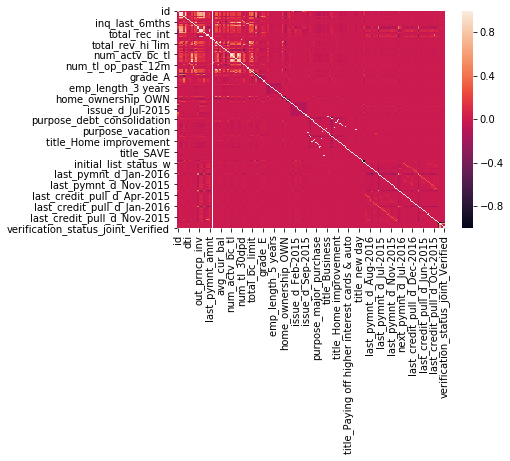

In [46]:
import seaborn as sns

g = sns.heatmap(X.corr())

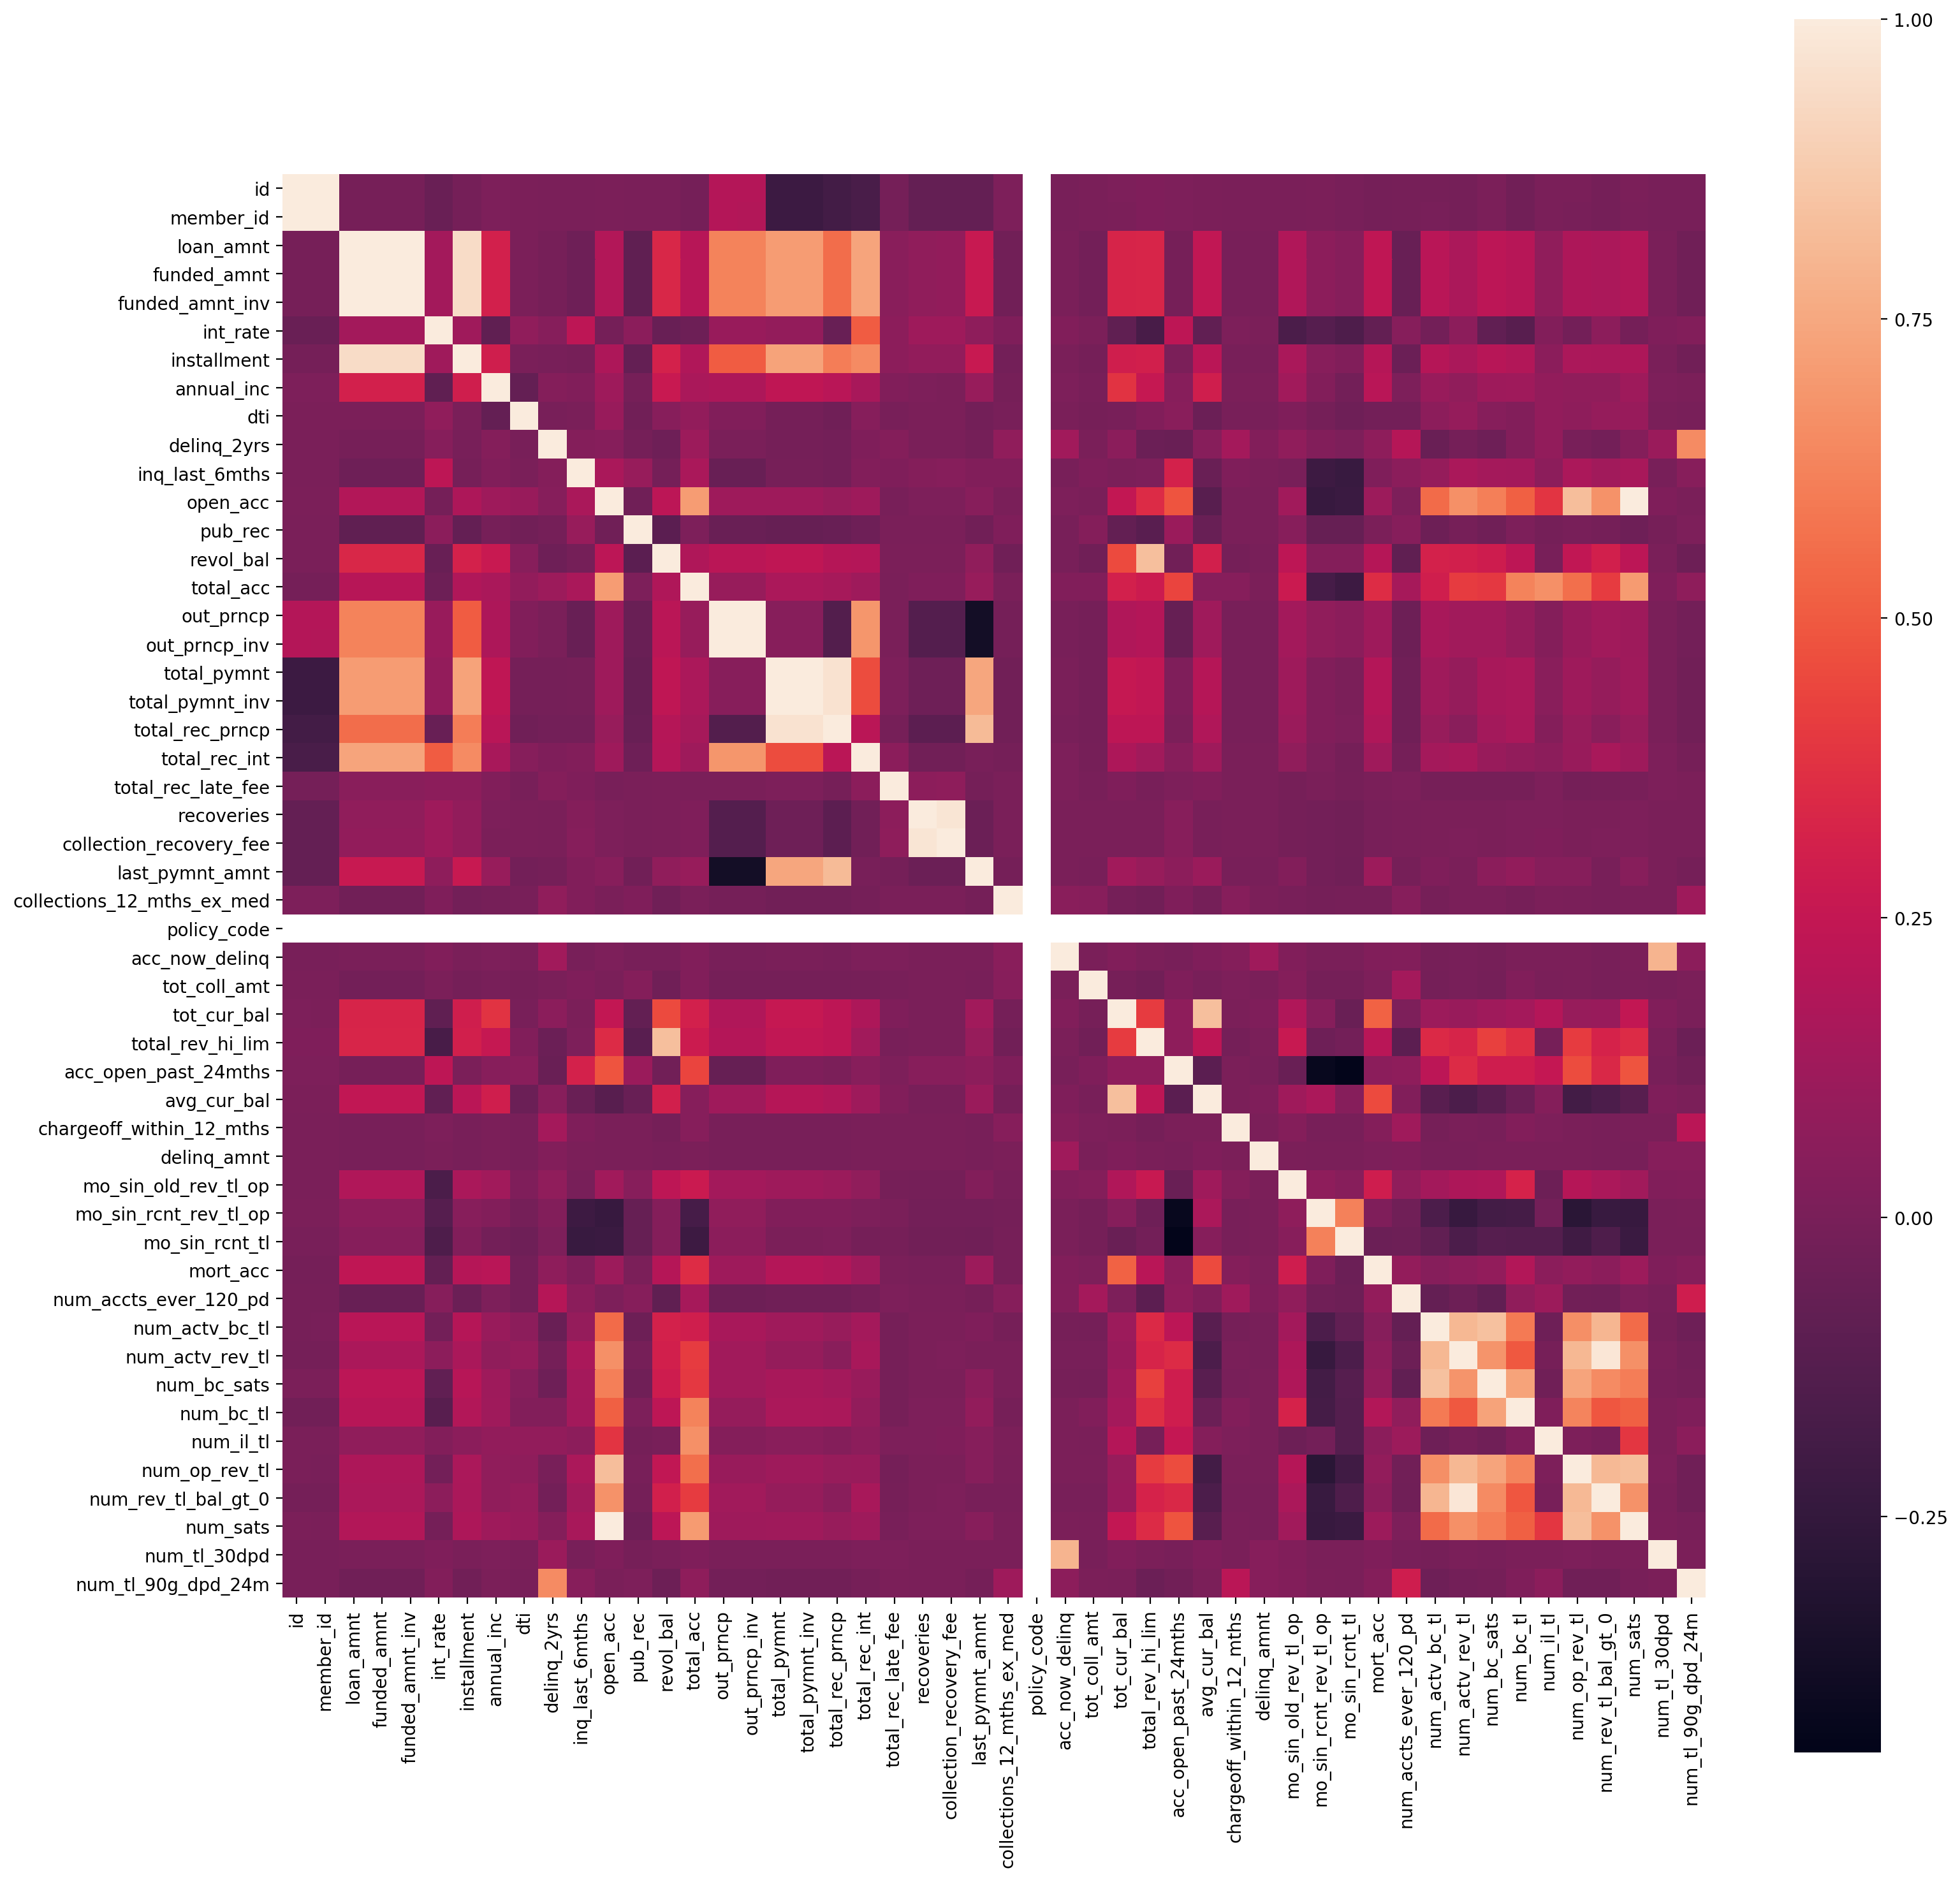

In [47]:
g = plt.figure(dpi=200, figsize=(18,18))
g = sns.heatmap(X.iloc[:, :50].corr(), xticklabels=True, yticklabels=True, square=True)

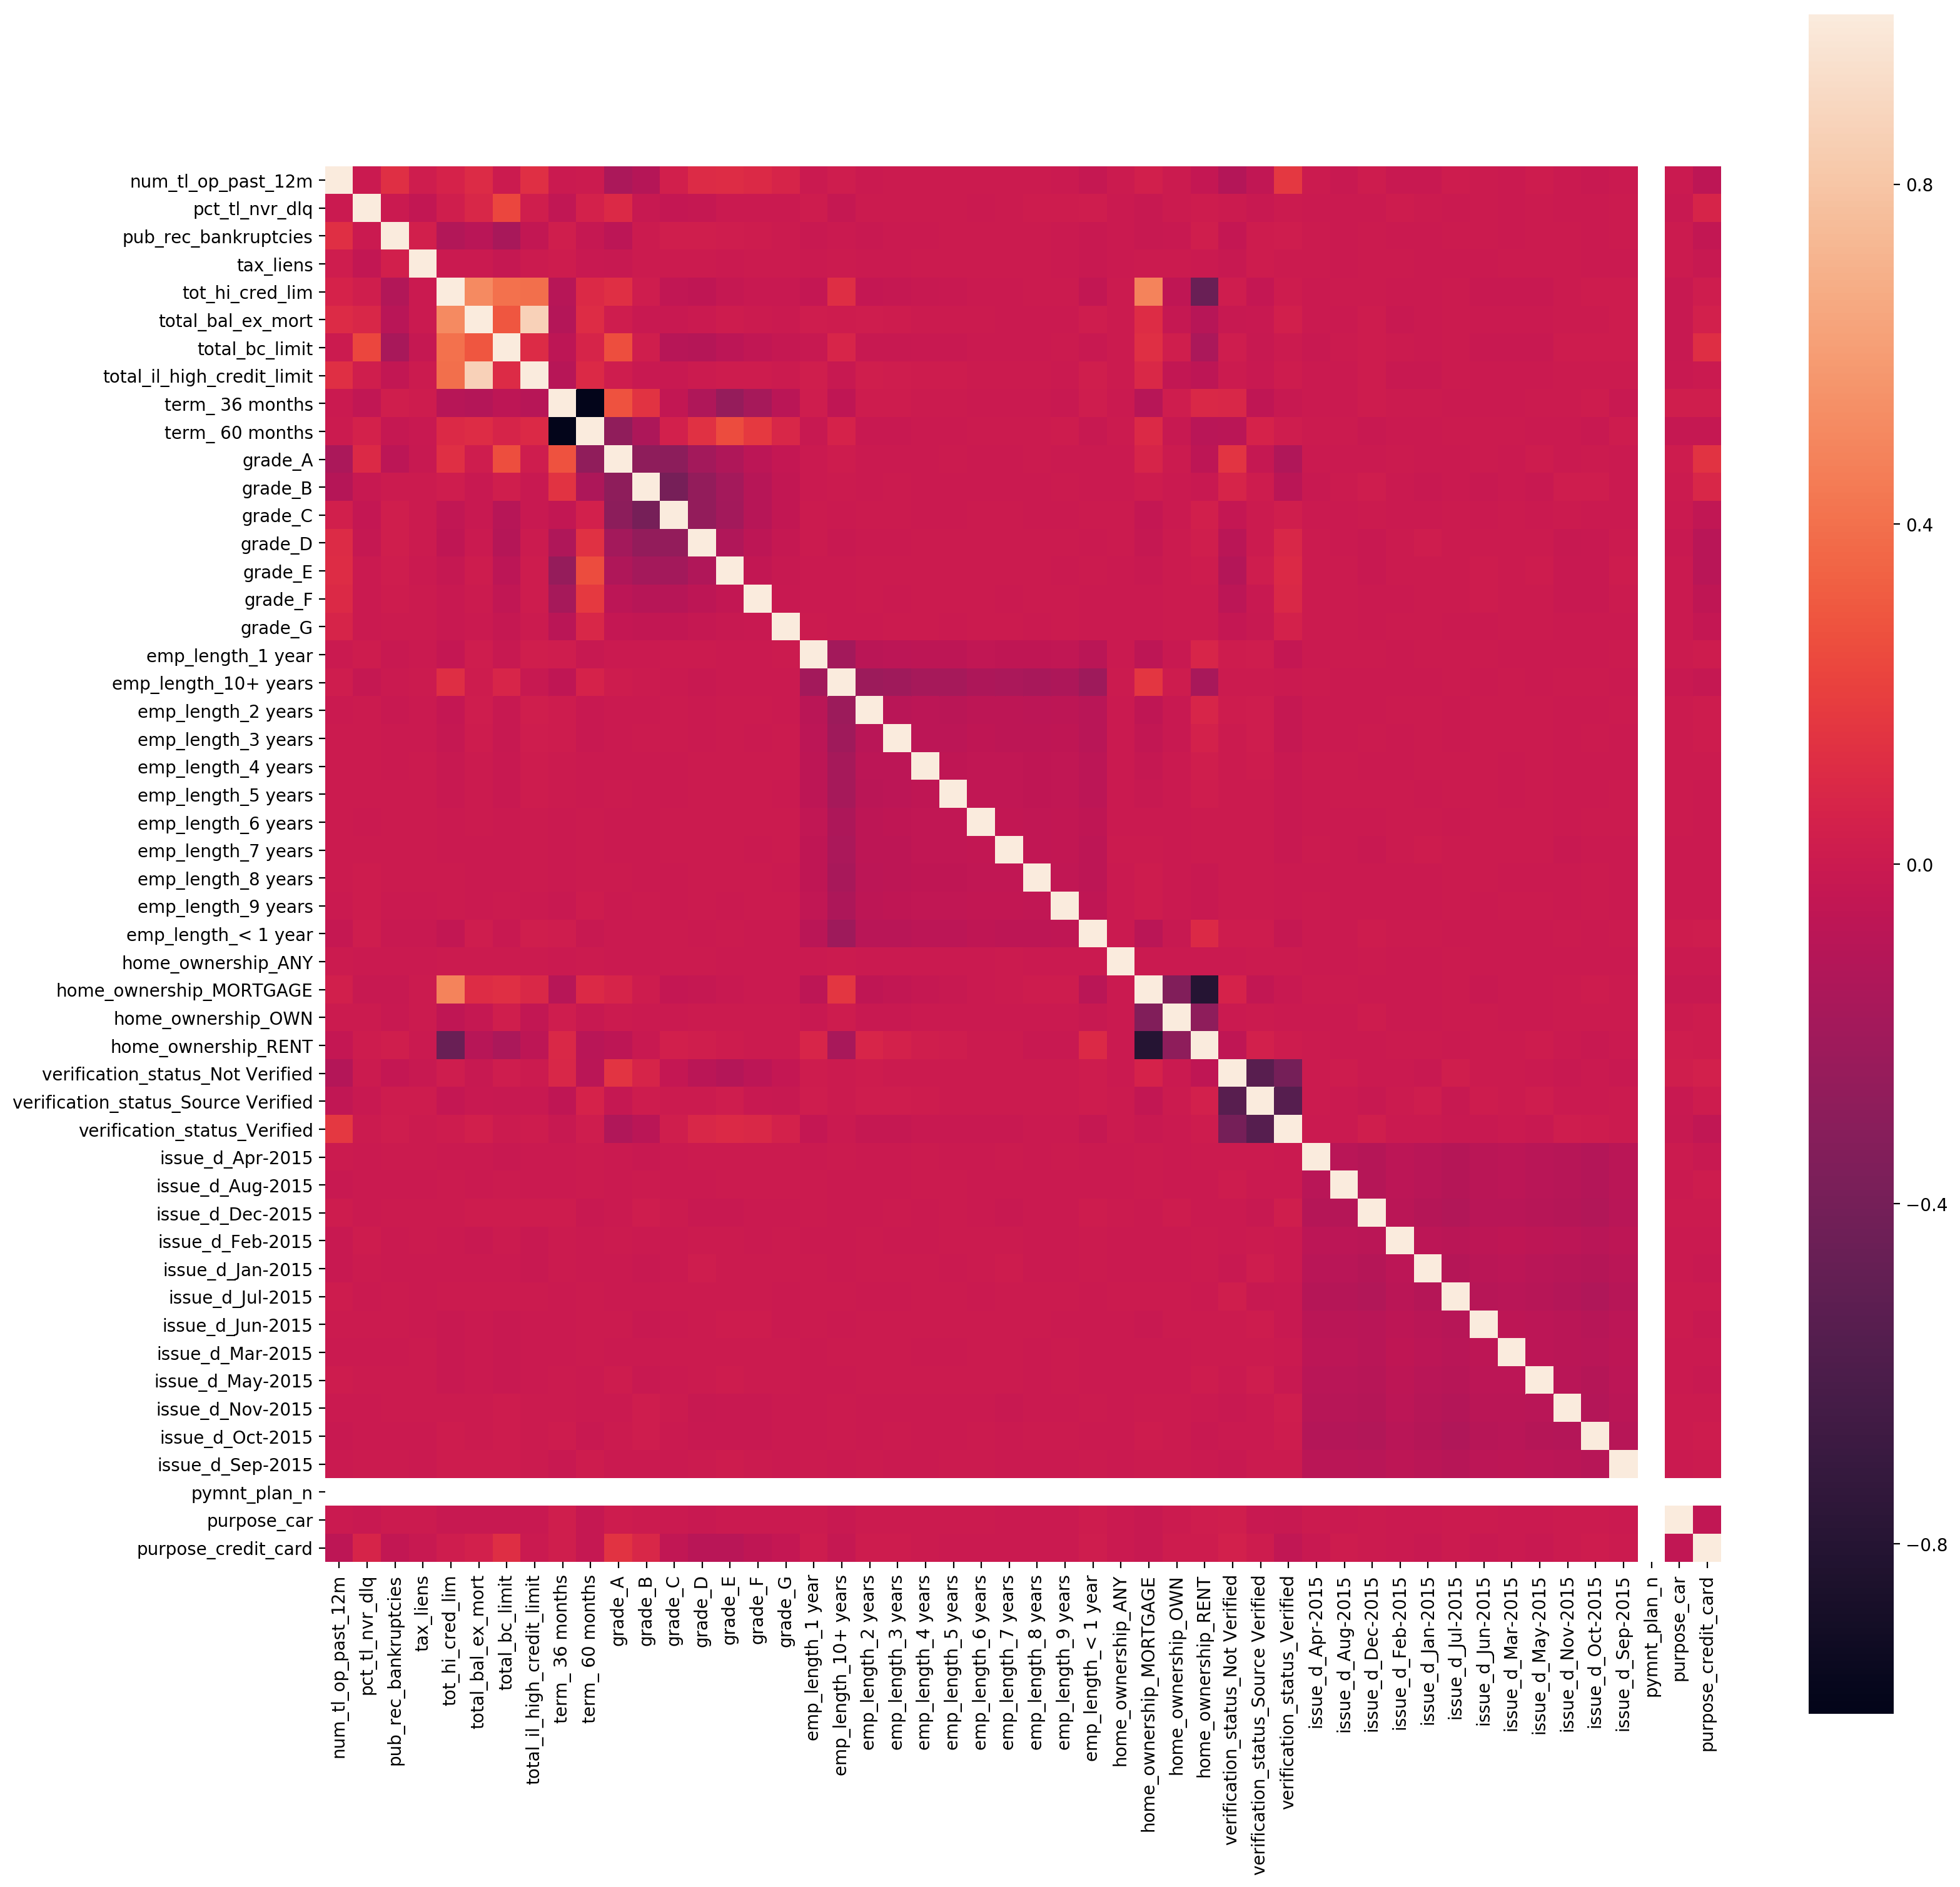

In [48]:
g = plt.figure(dpi=200, figsize=(18,18))
g = sns.heatmap(X.iloc[:, 50:100].corr(), xticklabels=True, yticklabels=True, square=True)

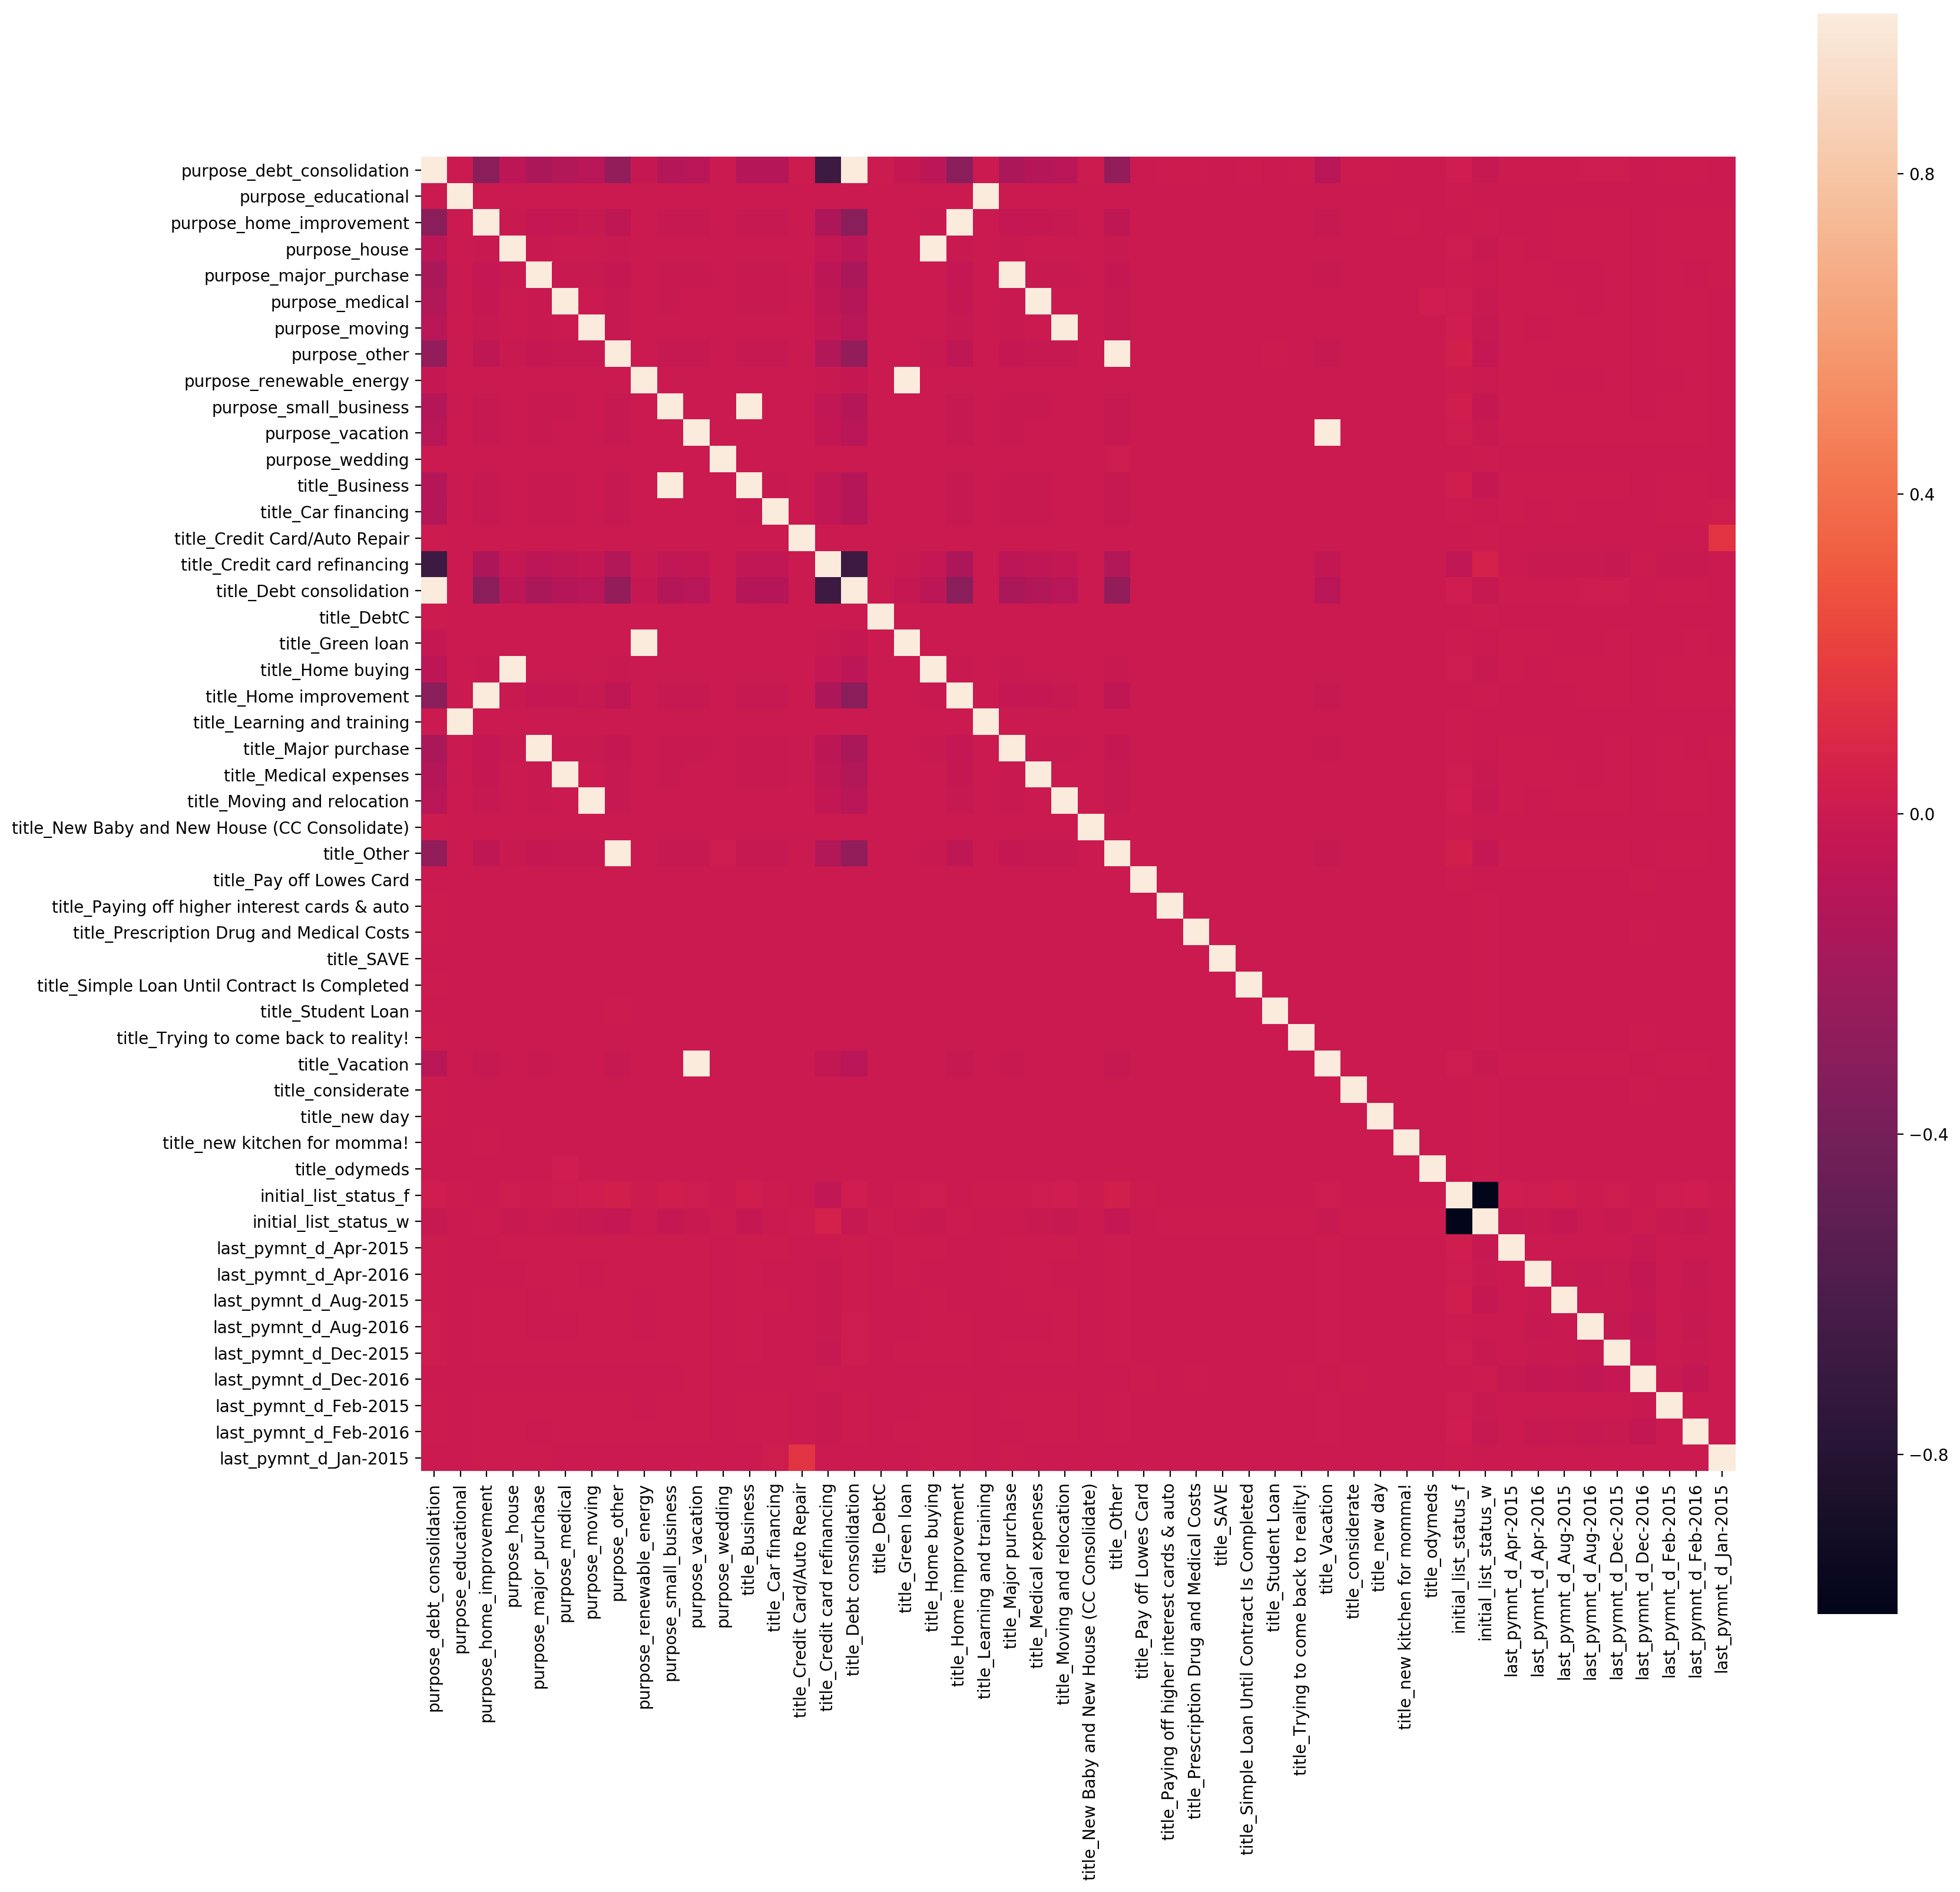

In [49]:
g = plt.figure(dpi=200, figsize=(18,18))
g = sns.heatmap(X.iloc[:, 100:150].corr(), xticklabels=True, yticklabels=True, square=True)

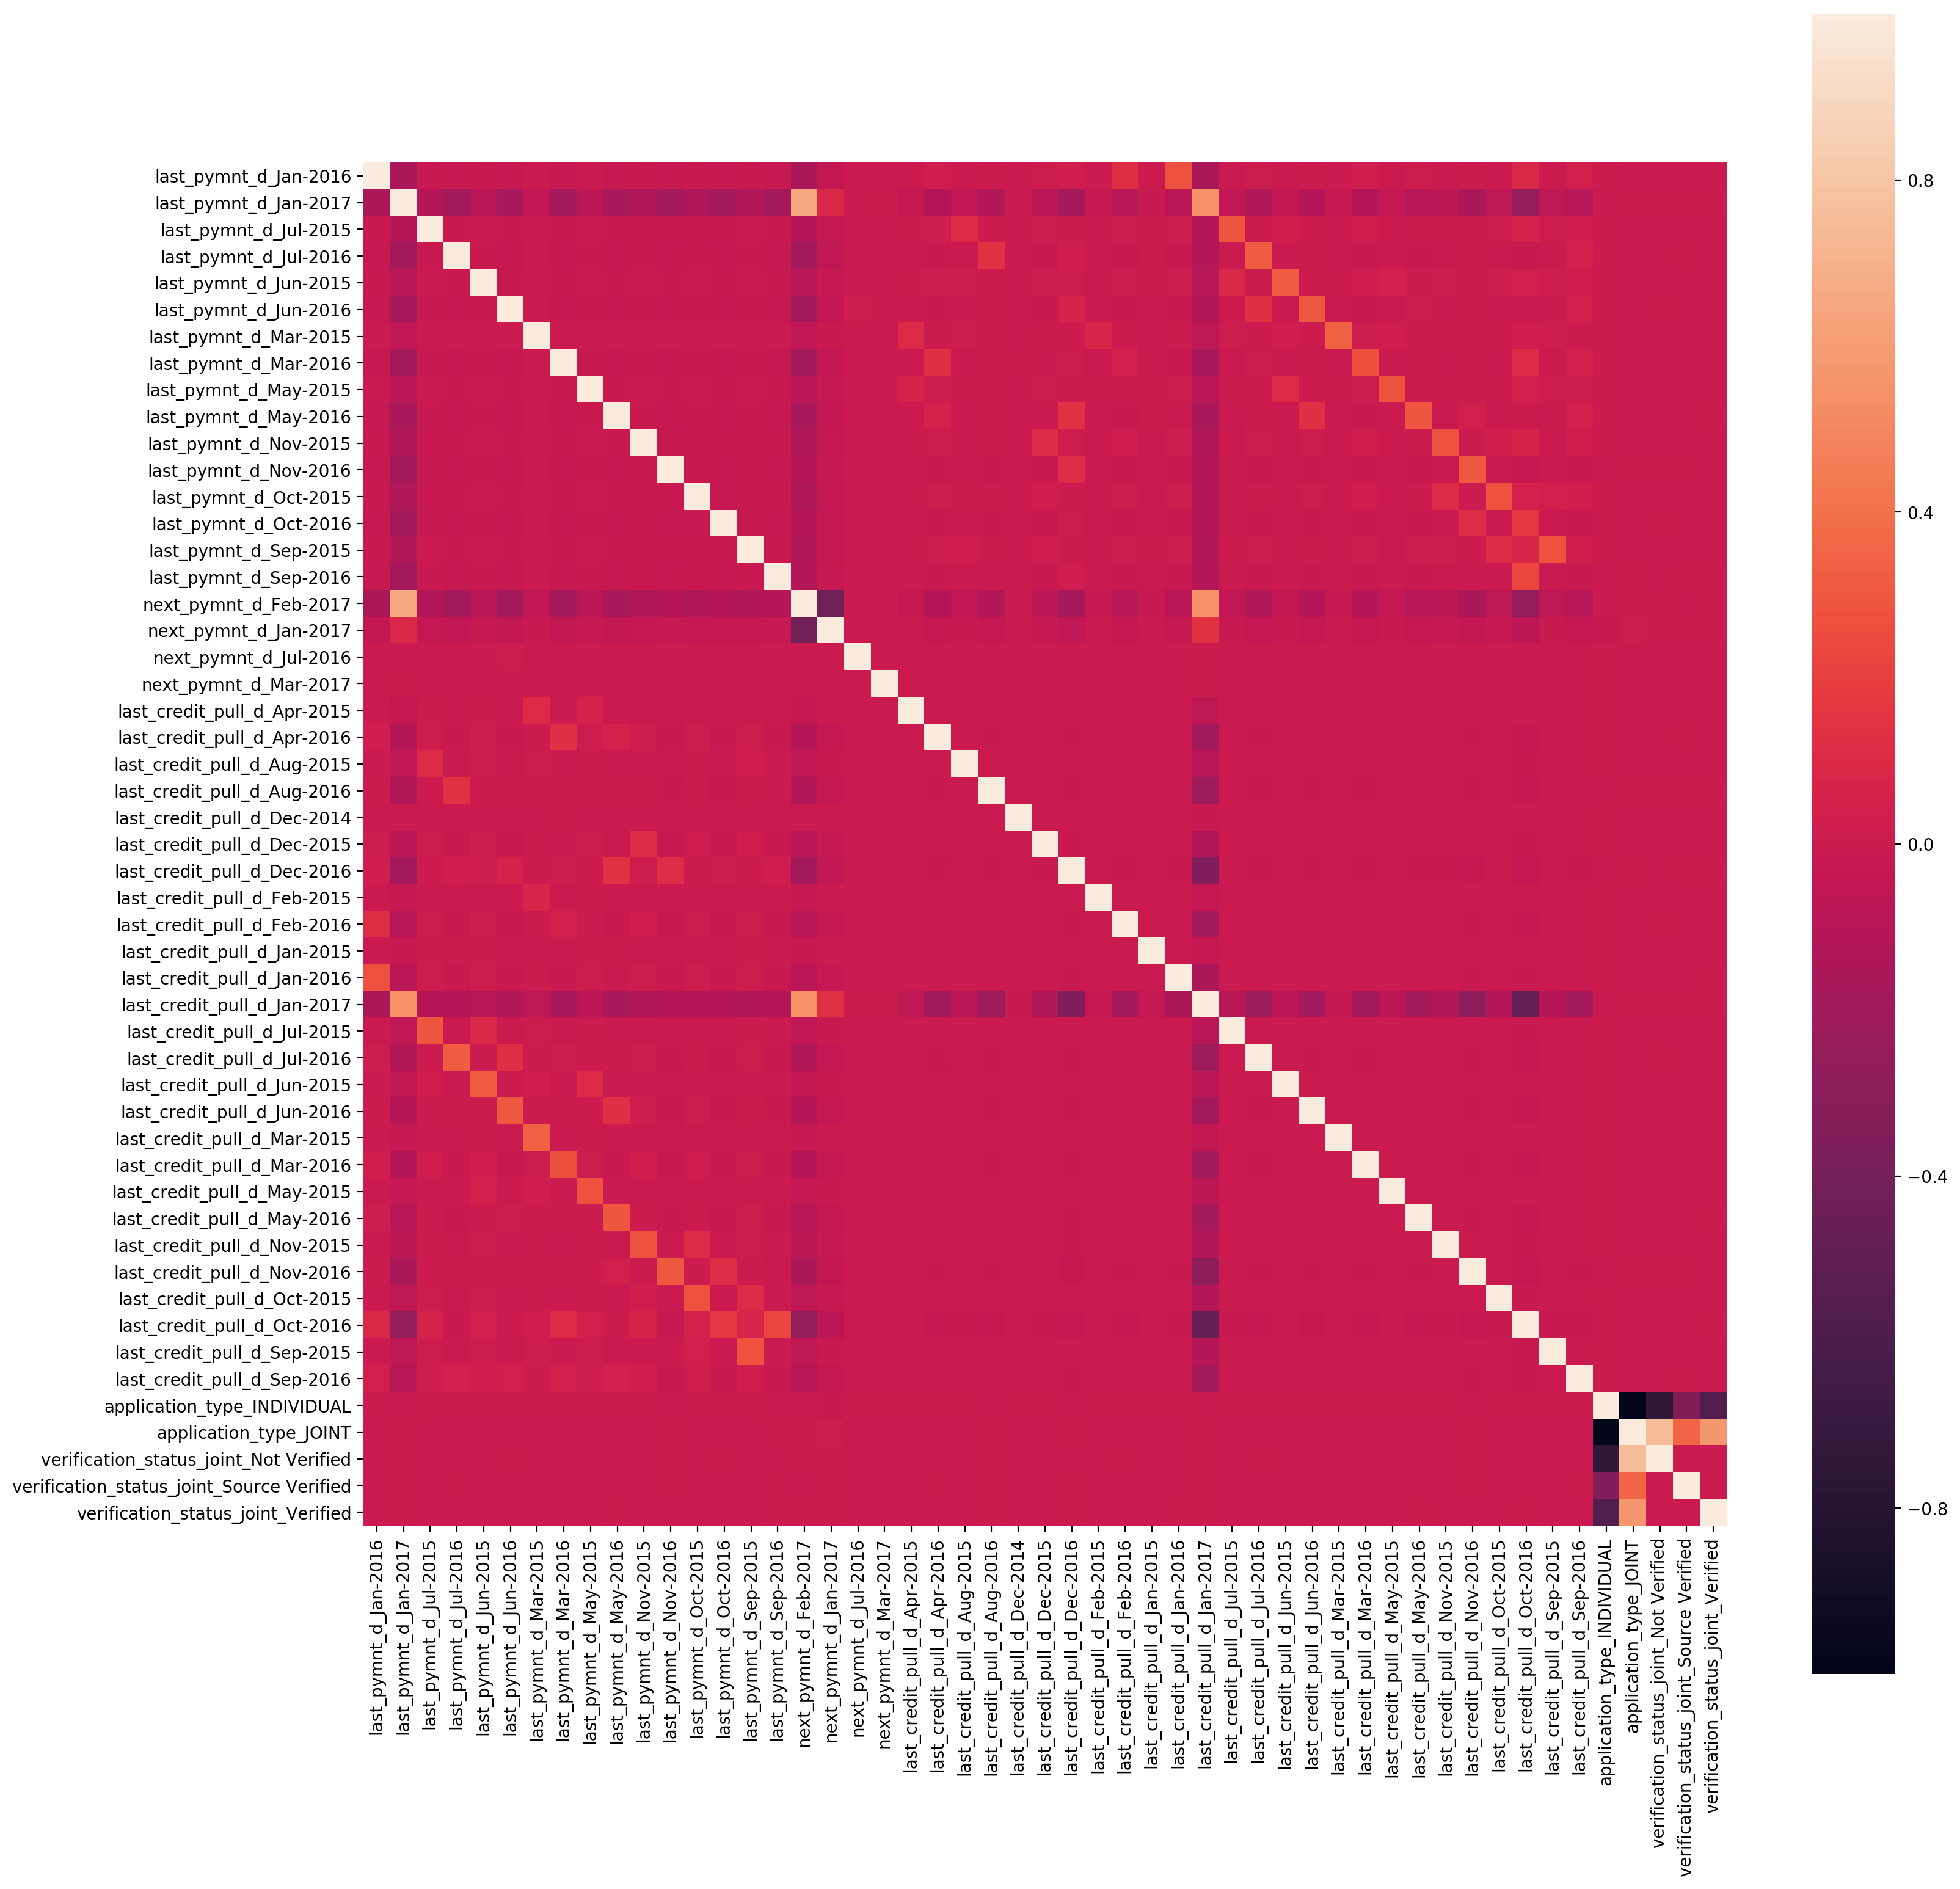

In [50]:
g = plt.figure(dpi=200, figsize=(18,18))
g = sns.heatmap(X.iloc[:, 150:].corr(), xticklabels=True, yticklabels=True, square=True)

In [51]:
sorted(X.columns.values)

['acc_now_delinq',
 'acc_open_past_24mths',
 'annual_inc',
 'application_type_INDIVIDUAL',
 'application_type_JOINT',
 'avg_cur_bal',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'delinq_2yrs',
 'delinq_amnt',
 'dti',
 'emp_length_1 year',
 'emp_length_10+ years',
 'emp_length_2 years',
 'emp_length_3 years',
 'emp_length_4 years',
 'emp_length_5 years',
 'emp_length_6 years',
 'emp_length_7 years',
 'emp_length_8 years',
 'emp_length_9 years',
 'emp_length_< 1 year',
 'funded_amnt',
 'funded_amnt_inv',
 'grade_A',
 'grade_B',
 'grade_C',
 'grade_D',
 'grade_E',
 'grade_F',
 'grade_G',
 'home_ownership_ANY',
 'home_ownership_MORTGAGE',
 'home_ownership_OWN',
 'home_ownership_RENT',
 'id',
 'initial_list_status_f',
 'initial_list_status_w',
 'inq_last_6mths',
 'installment',
 'int_rate',
 'issue_d_Apr-2015',
 'issue_d_Aug-2015',
 'issue_d_Dec-2015',
 'issue_d_Feb-2015',
 'issue_d_Jan-2015',
 'issue_d_Jul-2015',
 'issue_d_Jun-2015',
 'issue_d_M

In [52]:
features = X.drop(['id', 'member_id', 'policy_code', 'pymnt_plan_n',
                    'last_pymnt_d_Jan-2017', 'next_pymnt_d_Feb-2017',
                    'last_credit_pull_d_Jan-2017', 'purpose_debt_consolidation',
                    'title_Debt consolidation', 
                   ], axis=1) 

# Try PCA

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

# Take a subset of the data for PCA and drop missing values because PCA cannot
# handle them. We could also impute, but missingness is quite low so dropping
# missing rows is unlikely to create bias.
df_pca = features

# Normalize the data so that all variables have a mean of 0 and standard deviation
# of 1.
X = StandardScaler().fit_transform(df_pca)

# The NumPy covariance function assumes that variables are represented by rows,
# not columns, so we transpose X.
Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00000237e+00  1.00000237e+00  9.99996862e-01 ...  8.35951079e-03
   7.08866573e-03  1.43504240e-02]
 [ 1.00000237e+00  1.00000237e+00  9.99996862e-01 ...  8.35951079e-03
   7.08866573e-03  1.43504240e-02]
 [ 9.99996862e-01  9.99996862e-01  1.00000237e+00 ...  8.33752046e-03
   7.07129353e-03  1.43045760e-02]
 ...
 [ 8.35951079e-03  8.35951079e-03  8.33752046e-03 ...  1.00000237e+00
  -3.12145102e-04 -5.16540667e-04]
 [ 7.08866573e-03  7.08866573e-03  7.07129353e-03 ... -3.12145102e-04
   1.00000237e+00 -2.39751698e-04]
 [ 1.43504240e-02  1.43504240e-02  1.43045760e-02 ... -5.16540667e-04
  -2.39751698e-04  1.00000237e+00]]


In [54]:
# Calculating eigenvalues and eigenvectors.
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors.
for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].reshape(1, 192).T


/Users/majic/.local/share/virtualenvs/thinkful-py3-eTaMB5Ia/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


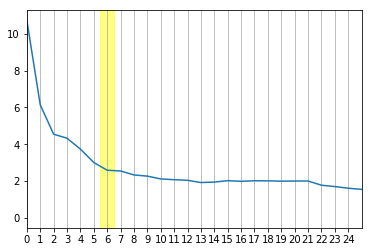

In [55]:
plt.plot(eig_val_cov)
plt.xlim(0, 25)
plt.xticks(np.arange(0, 25, 1))
plt.grid(b=None, which='major', axis='x', animated=True)
plt.axvspan(5.5, 6.5, color='yellow', alpha=0.5)
plt.show()

# Choose 6 Principal Components

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.05589048 0.03201644 0.02367499 0.02253971 0.01945606 0.01566407]


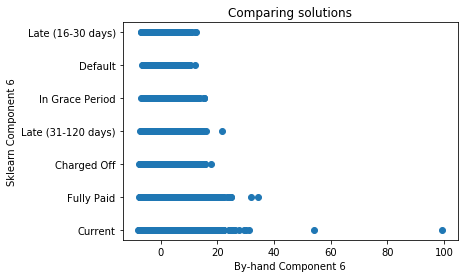

In [56]:
sklearn_pca = PCA(n_components=6)
Y_sklearn = sklearn_pca.fit_transform(X)

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    sklearn_pca.explained_variance_ratio_
)

# Compare the sklearn solution to ours – a perfect match.
plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 6')
plt.xlabel('By-hand Component 6')
plt.show()

In [36]:
X.columns.values

array(['int_rate', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies',
       'tax_liens'], dtype=object)

# Remove all features after 50

In [22]:
reduced = features.iloc[:, :51]

reduced.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,num_il_tl,num_op_rev_tl,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens
0,16000.0,16000.0,16000.0,14.85,379.39,48000.0,33.18,0.0,0.0,11.0,...,6.0,9.0,9.0,11.0,0.0,0.0,2.0,78.9,0.0,2.0
1,9600.0,9600.0,9600.0,7.49,298.58,60000.0,22.44,0.0,0.0,7.0,...,5.0,4.0,3.0,7.0,0.0,0.0,2.0,100.0,0.0,0.0
2,25000.0,25000.0,25000.0,7.49,777.55,109000.0,26.02,0.0,1.0,9.0,...,7.0,5.0,3.0,9.0,0.0,0.0,0.0,100.0,0.0,0.0
3,28000.0,28000.0,28000.0,6.49,858.05,92000.0,21.60,0.0,0.0,16.0,...,4.0,13.0,9.0,16.0,0.0,0.0,0.0,91.7,0.0,0.0
4,8650.0,8650.0,8650.0,19.89,320.99,55000.0,25.49,0.0,4.0,18.0,...,2.0,17.0,13.0,18.0,0.0,0.0,12.0,100.0,1.0,0.0


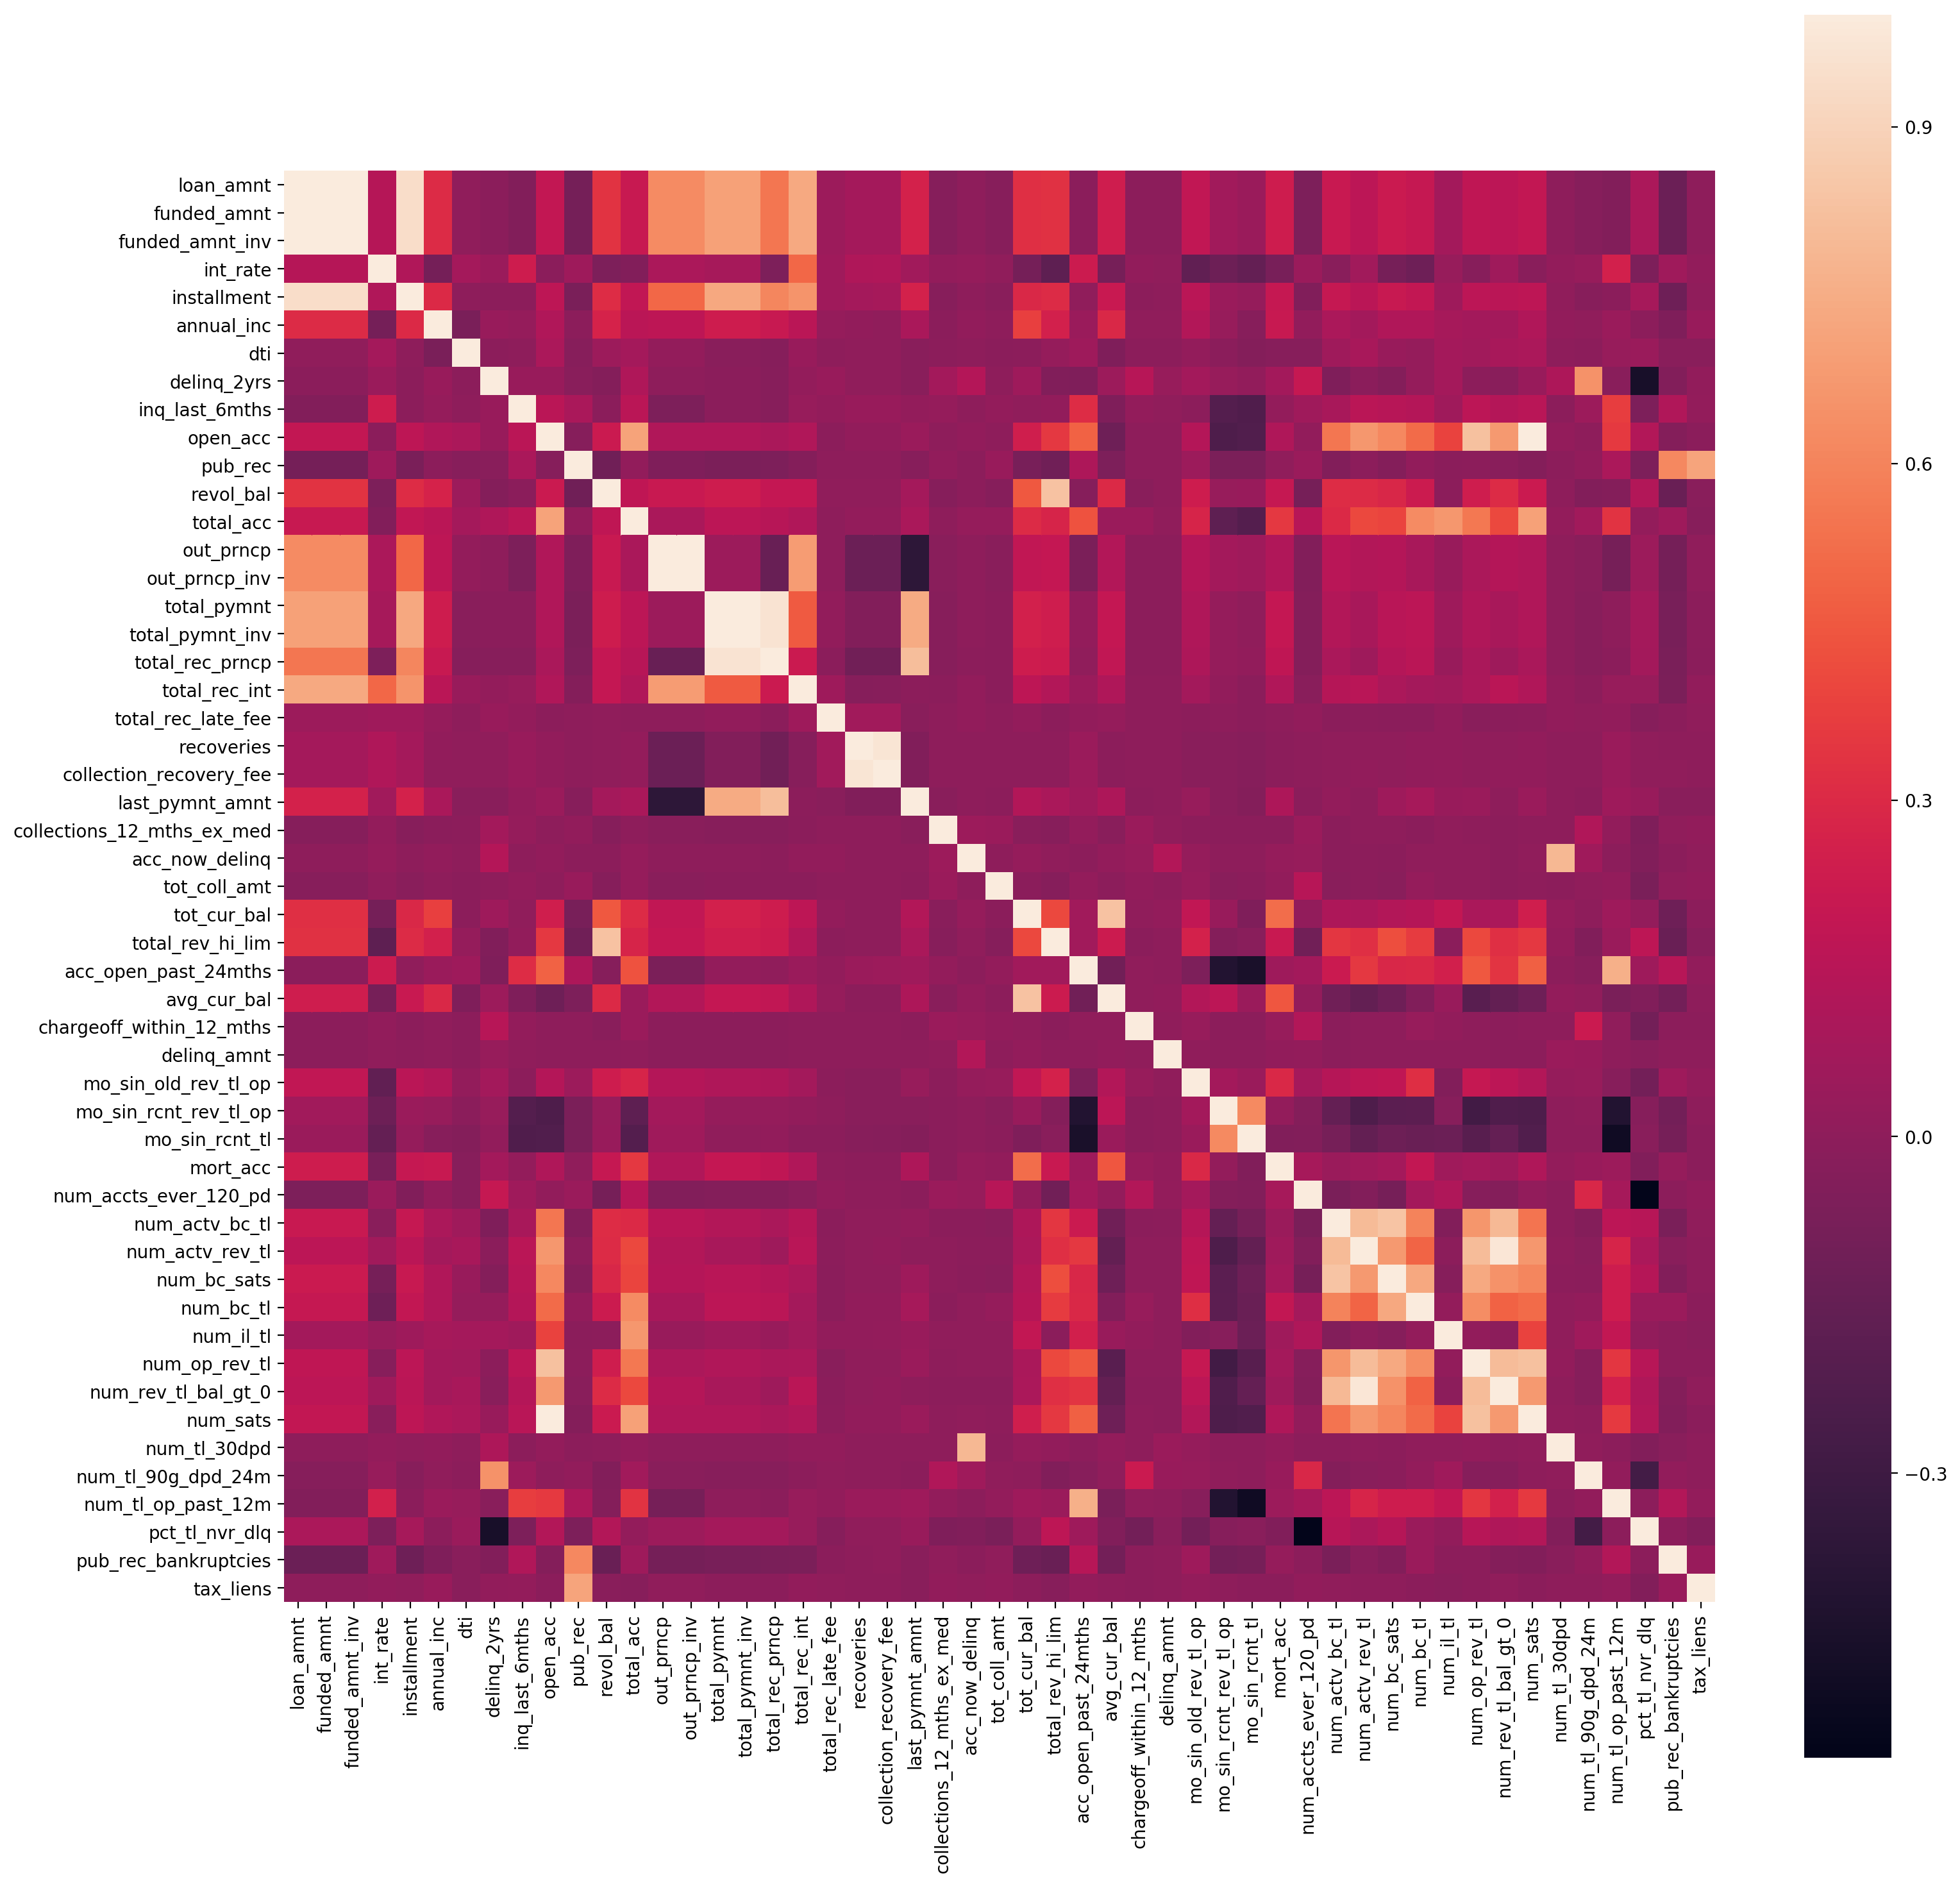

In [23]:
g = plt.figure(dpi=200, figsize=(18,18))
g = sns.heatmap(reduced.corr(), xticklabels=True, yticklabels=True, square=True)

In [24]:
reduced = reduced.drop(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment'], 1)

In [25]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time

X = reduced
start_time = time.time()

print(cross_val_score(rfc, X, Y, cv=10))

print("--- %s seconds ---" % (time.time() - start_time))

[0.95578352 0.96388117 0.96214766 0.96058037 0.96034196 0.96031821
 0.96015104 0.95960484 0.9598879  0.95912697]
--- 303.6212000846863 seconds ---


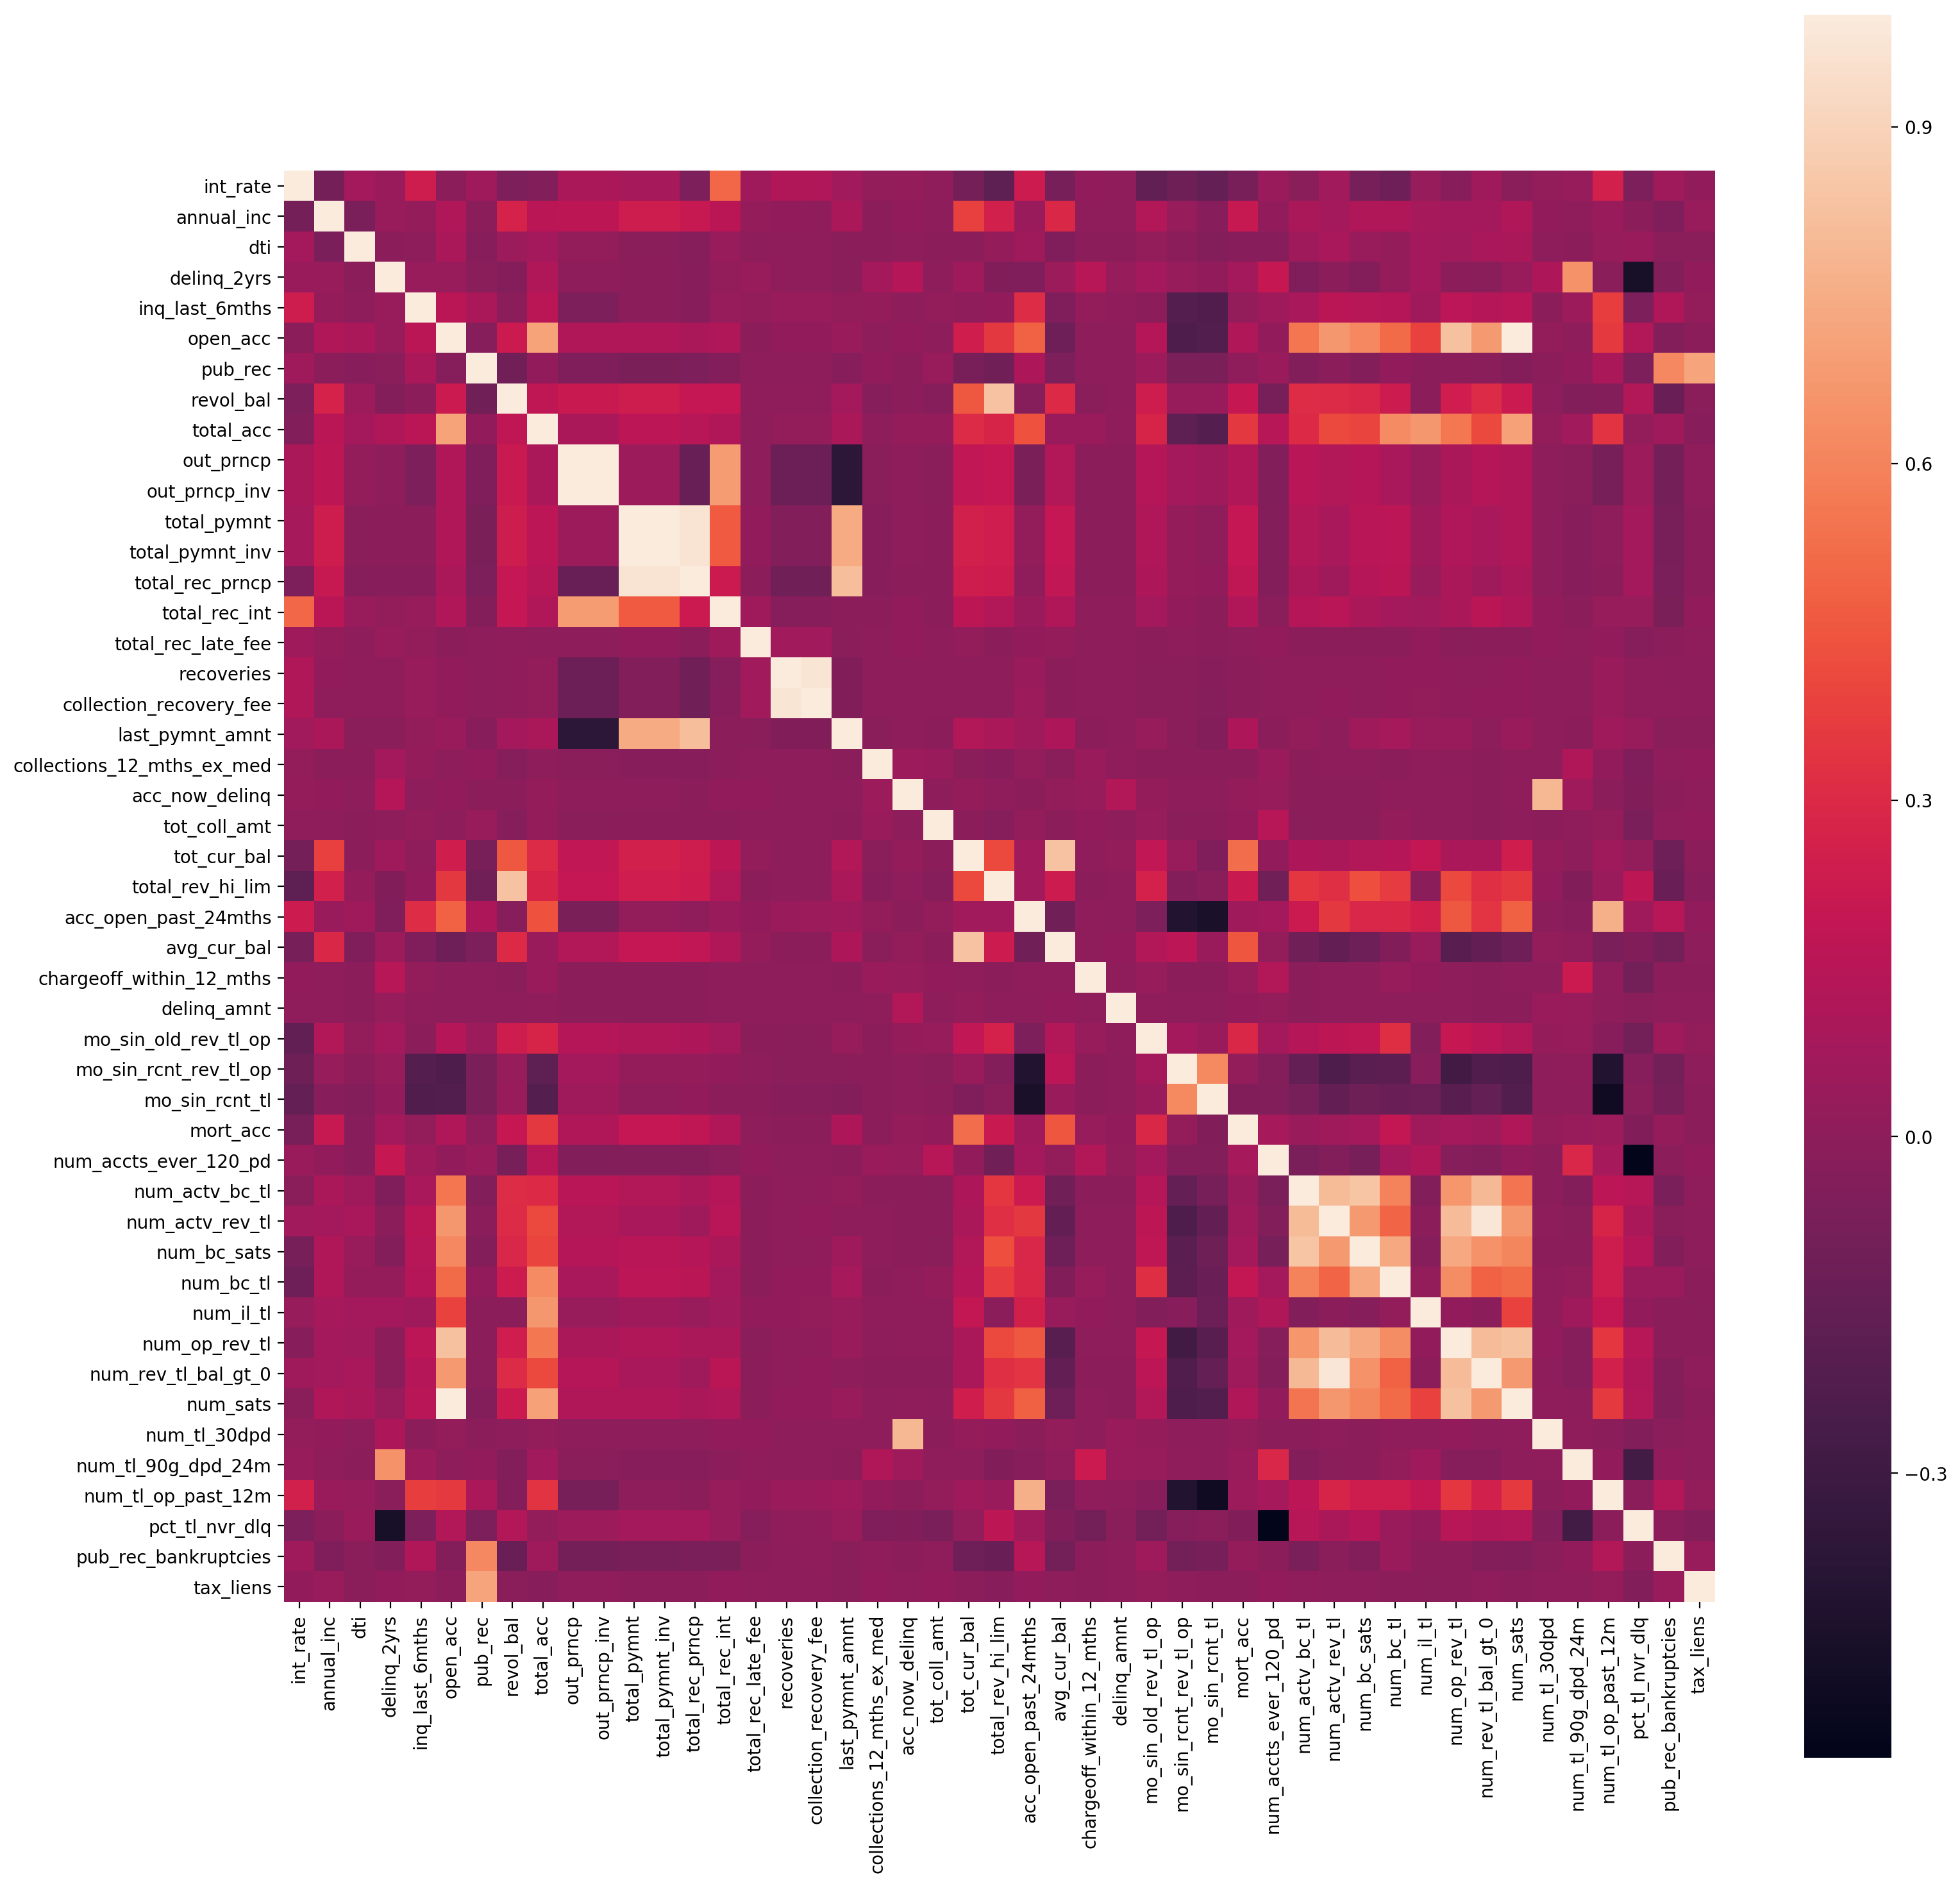

In [26]:
g = plt.figure(dpi=200, figsize=(18,18))
g = sns.heatmap(reduced.corr(), xticklabels=True, yticklabels=True, square=True)

In [32]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time

X = reduced.drop(reduced.iloc[:, 23:44].columns, 1)
start_time = time.time()

print(cross_val_score(rfc, X, Y, cv=10))

print("--- %s seconds ---" % (time.time() - start_time))

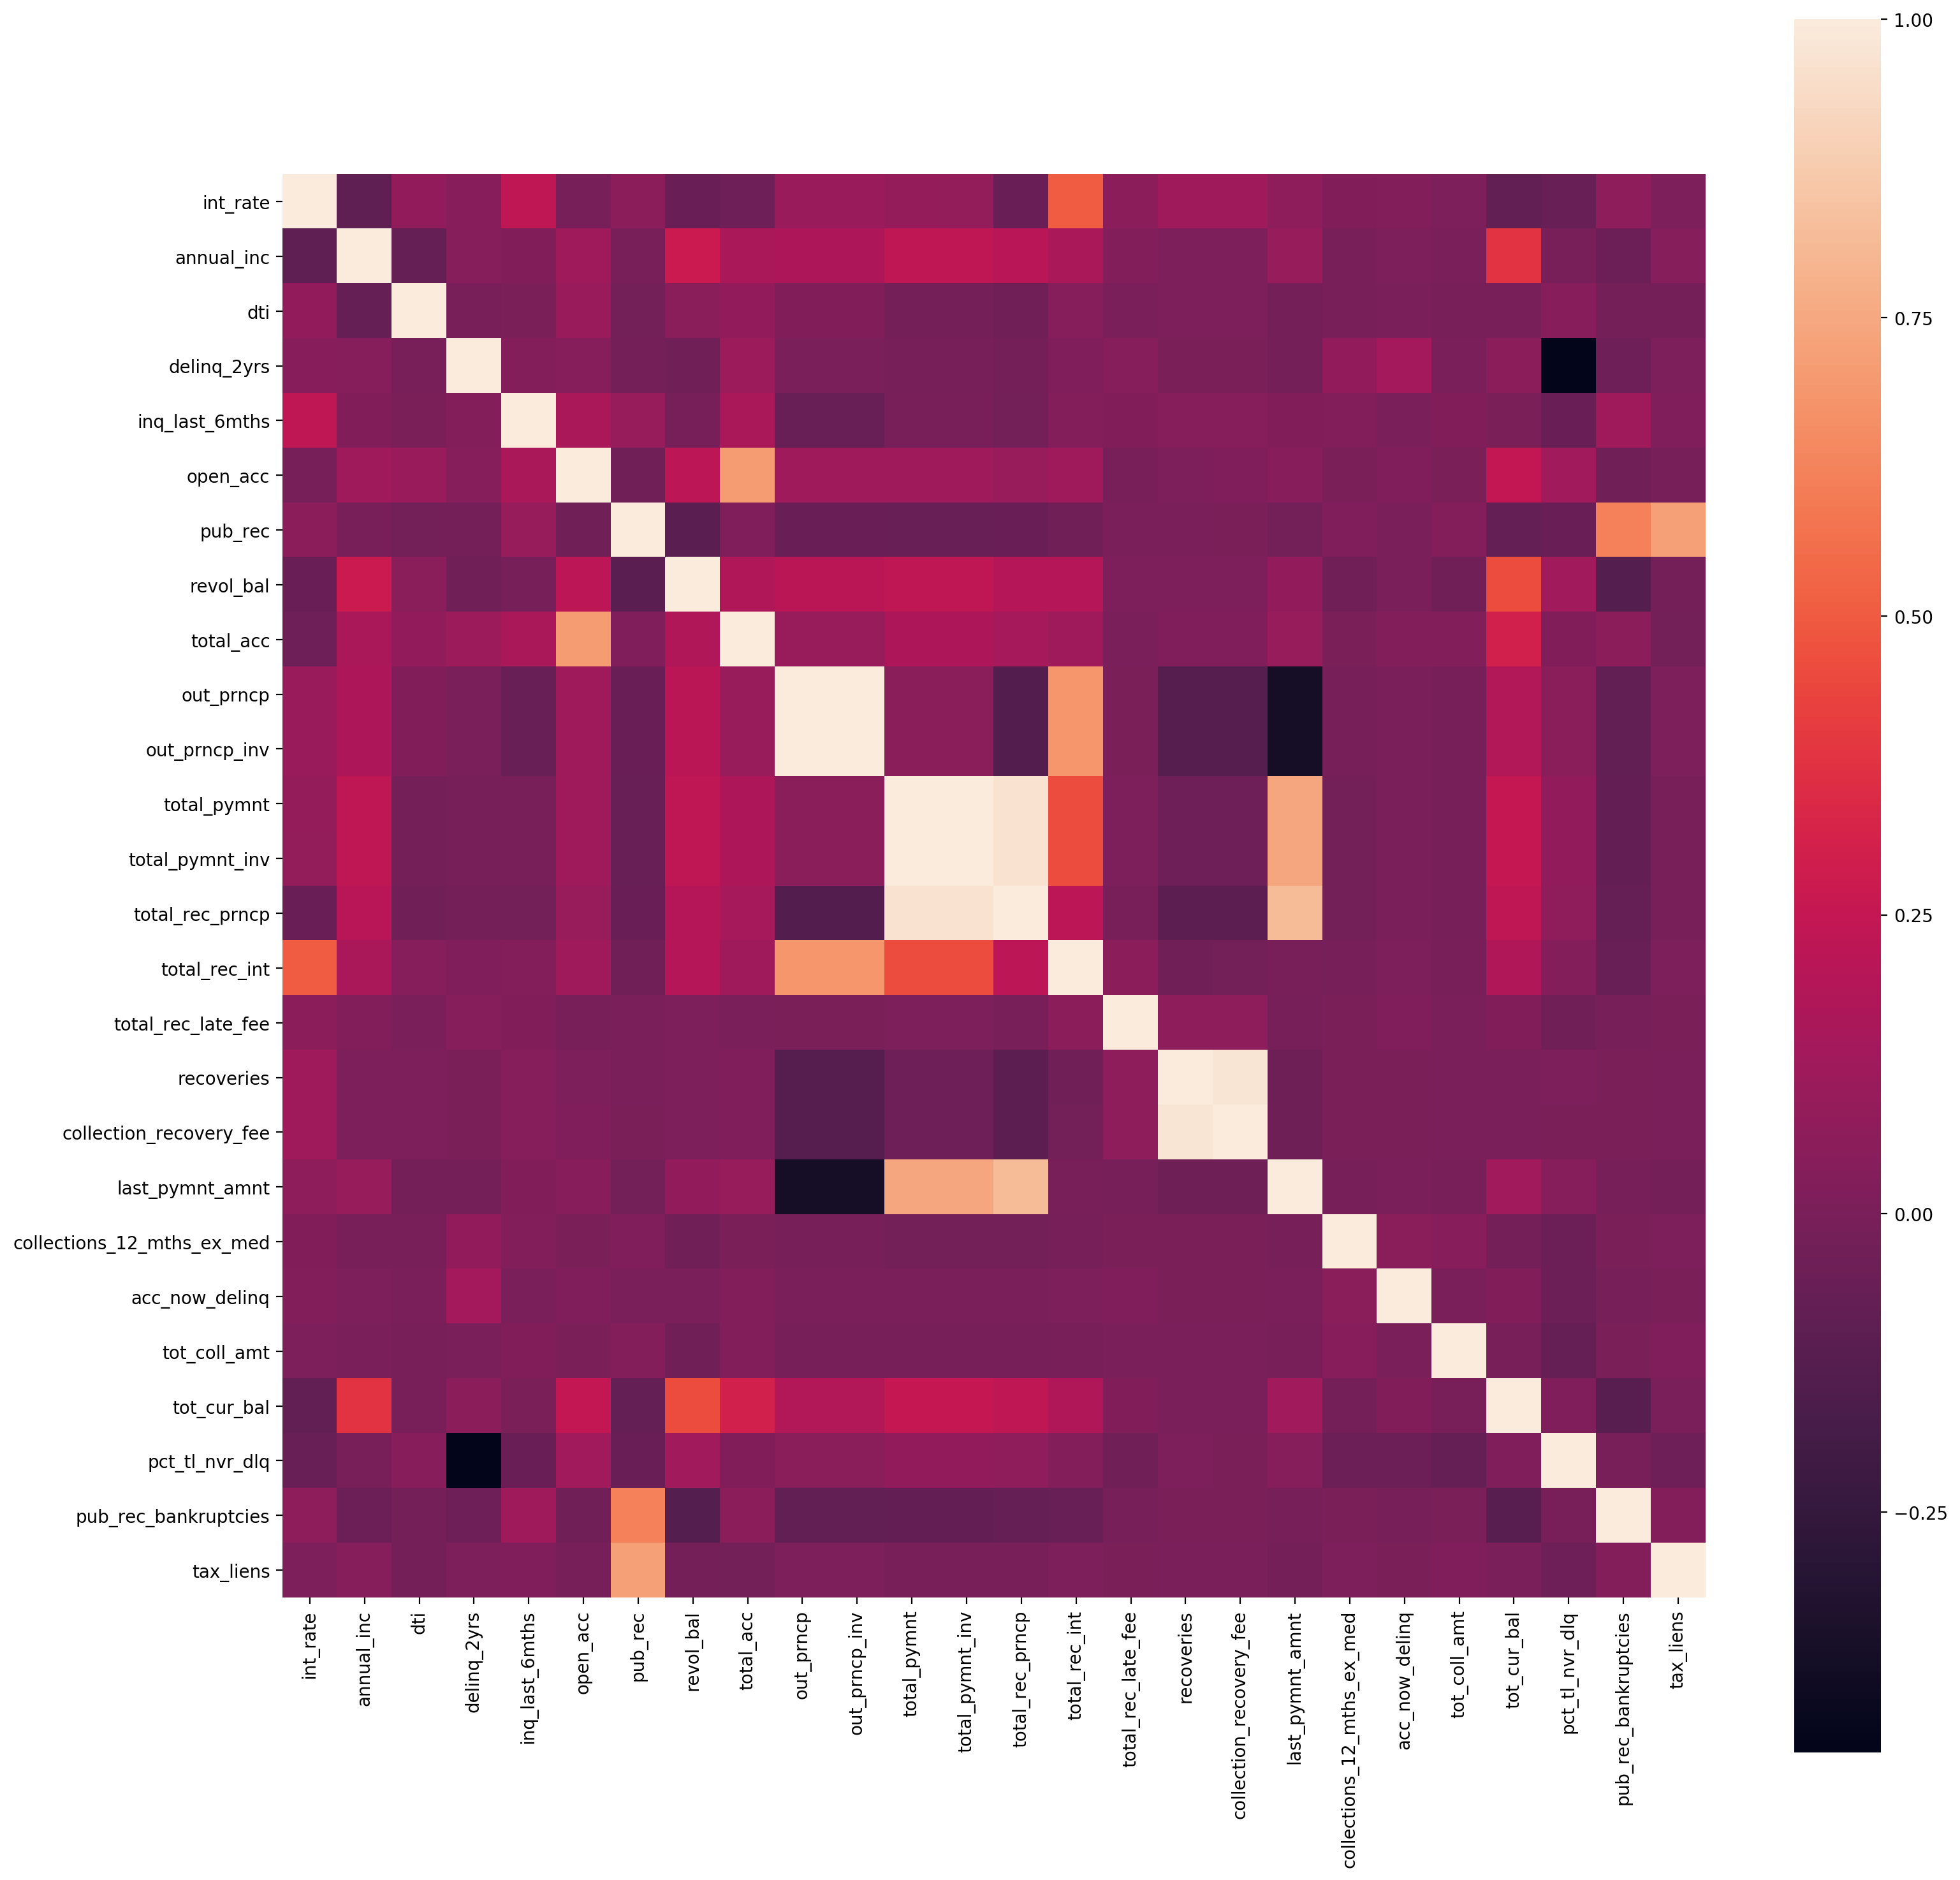

In [28]:
g = plt.figure(dpi=200, figsize=(18,18))
g = sns.heatmap(X.corr(), xticklabels=True, yticklabels=True, square=True)

In [33]:
# This is the model we'll be using.
from sklearn import tree

# A convenience for displaying visualizations.
from IPython.display import Image

# Packages for rendering our tree.
import pydotplus
import graphviz

# Initialize and train our tree.
decision_tree = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_features=6,
    max_depth=30,
    random_state = 1337
)
decision_tree.fit(X, Y)

start_time = time.time()

print(cross_val_score(decision_tree, X, Y, cv=10))

print("--- %s seconds ---" % (time.time() - start_time))

[0.82633991 0.92182565 0.924794   0.92823728 0.92540964 0.924436
 0.91481631 0.92514664 0.92846795 0.93741985]
--- 35.38608002662659 seconds ---


In [29]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
import time


X = X[['tot_cur_bal', 'annual_inc', 'int_rate', 'total_rec_int', 'pub_rec', 'last_pymnt_amnt', 'open_acc', 'revol_bal', 'total_acc' ]]
start_time = time.time()

print(cross_val_score(rfc, X, Y, cv=10))

print("--- %s seconds ---" % (time.time() - start_time))

[0.89826886 0.92382038 0.92082829 0.9185486  0.91621943 0.91367846
 0.91339144 0.91058919 0.90968248 0.8913219 ]
--- 127.83438181877136 seconds ---
